<a href="https://www.kaggle.com/code/rasoulisaeid/optic-neuritis-study?scriptVersionId=132207731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Predicting the Risk of Multiple Sclerosis Development in Patients with Optic Neuritis: An Analysis of the Optic Neuritis Treatment Trial (ONTT) Dataset

**In this study, we utilized an online dataset from the Optic Neuritis Treatment Trial (ONTT), a randomized controlled trial that evaluated the effects of corticosteroids on acute optic neuritis and the subsequent development of clinically definite multiple sclerosis (CDMS). The publicly available ONTT dataset can be accessed online at http://lons.jaeb.org/. Previous articles have described the details of the study (1, 2, 3).**

1_ Beck RW, Cleary PA, Anderson MM Jr, et al. A randomized, controlled trial of corticosteroids in the treatment of acute optic neuritis. N Engl J Med. 1992; 326(9):581-588. 5. 

2_ Beck RW, Cleary PA, Trobe JD, et al. The effect of corticosteroids for acute optic neuritis on the subsequent development of multiple sclerosis. N Engl J Med. 1993; 329(24):1764-1769. 9. 

3_ Beck RW, Trobe JD, Moke PS, et al; Optic Neuritis Study Group. High and low risk profiles for the development of multiple sclerosis within ten years after optic neuritis: experience of the Optic Neuritis Treatment Trial. Arch Ophthalmol. 2003;121(7):944-949.


**The trial enrolled 457 patients aged between 18 and 46 years with a diagnosis of unilateral acute optic neuritis and visual symptoms lasting 8 days or less before enrollment, and without a history of acute optic neuritis in the affected eye or evidence of systemic disease that can cause optic neuritis, other than MS. Patients were randomly assigned to three treatment groups: low-dose oral prednisone, high-dose intravenous methylprednisolone followed by oral prednisone, and oral placebo. Standardized ophthalmic and neurological examinations were performed at enrollment, at 6 and 12 months, and then annually for up to 5 years after enrollment and then at years 10 and 15. Standardized unenhanced MRI of the brain was performed at enrollment, and the number of white matter lesions of at least 3 mm in diameter on T2-weighted MRI was determined. 
Diagnoses were derived from the ONTT through application of Poser’s criteria during the study follow-up period(4). The potential predictive variables associated with CDMS conversion were selected from the demographic and clinic-radiological features at the time of enrollment before modeling based on the clinical importance, professional opinion of the physician involved, and previously published evidence. Patients were followed up for their visual outcomes and the development of CDMS.**

4_ Poser CM, Paty DW, Scheinberg L, McDonald WI, Davis FA, Ebers GC, Johnson KP, Sibley WA, Silberberg DH, Tourtellotte WW. New diagnostic criteria for multiple sclerosis: guidelines for research protocols. Ann Neurol. 1983;13:227–231.

**The major inclusion criteria for the ONTT were a diagnosis of unilateral acute optic neuritis in patients aged between 18 and 46 years together with visual symptoms lasting 8 days or less before enrollment. Out of the initial 457 patients suspected to have ON, we excluded 66 patients as they had probable or definite Multiple Sclerosis, 2 patients because they were misdiagnosed with Optic Neuritis, and 1 patient because of withdrawal from the study. The resulting sample size was 388 patients. The dataset includes demographic information such as age and gender, as well as clinical data such as visual acuity, visual fields, and MRI results. We only used the baseline data for our study, except for three variables: Multiple Sclerosis diagnosis, Family History of MS and Family History of ON, which could change during the trial. Out of the 388 patients, 154 developed MS during a 15-year period, while 234 remained MS negative.**


### List of Contents

1. [Dataset](#importing-dataset)
2. [Data Preparing](#data-preparing)
3. [Data Visualization](#data-visualization)
4. [Feature Selection](#feature-selection)
5. [Feature Engineering](#feature-engineering)
6. [Model Creation](#model-creation)
7. [Model Evaluation](#model-evaluation)

# 1. Dataset <a name="importing-dataset"></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
rc = {
    "axes.facecolor": "#F8F8F8",
    "figure.facecolor": "#F8F8F8",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7" + "30",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

palette = ['#302c36', '#037d97', '#91013E', '#C09741',
           '#EC5B6D', '#90A6B1', '#6ca957', '#D8E3E2']

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
mgt = Style.BRIGHT + Fore.MAGENTA
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

### About Dataset

| Column Index | Variables | Description |
| ------------ | ----------- | ----------- |
| 0 | Patient ID | Unique ID specific to each patient |
| 1 | Gender | 0: Female, 1: Male |
| 2 | Age Group | 0: Age < 30 years, 1: Age > 30 years |
| 3 | Race | 0: non-white, 1: white |
| 4 | Season | 1: Spring, 0: Other|
| 5 | Treatment Group | 0: Oral Corticosteroid or No Treatment, 1: Intravenous Corticosteroid |
| 6 | Visual Acuity | Visual Acuity LogMAR => 0: < 1, 1: >= 1 |
| 7 | ON Type | 0: Normal-Retrobulbar, 1: Edema-Papilitis |
| 8 | Eye Pain | 0: No Pain, 2: Has Pain |
| 9 | Lesions Group | Number of white matter lesions with at least 3mm diameter in T2 Weighted Brain MRI: 0: No plaque, 1: 1 or more plaque |
| 10 | Neurologic History | Had Prior neurologic symptoms?(0: no, 1: yes) |
| 11 | North | Lived in the North 10 or more of the first 15 years of life?(0: no, 1: yes) |
| 12 | Mean Deviation | Visual field mean deviation(0 to -32 db) |
| 13 | ON History | History of Optic Neuritis(0: negative, 1: positive) |
| 14 | Smoking | 0: not smoker, 1: smoker |
| 15 | MS FH | Multiple Sclerosis Family History(0: negative, 1: positive) |

In [2]:
data = pd.read_csv('/kaggle/input/ontt-data/final_data.csv')
data['season'] = (data['season'] == 4).astype(np.int32)
data.drop(columns=['neuro_on'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  388 non-null    int64  
 1   gender              388 non-null    int64  
 2   age                 388 non-null    int64  
 3   race                388 non-null    int64  
 4   season              388 non-null    int32  
 5   treatment_group     388 non-null    int64  
 6   on_type             388 non-null    int64  
 7   pain                388 non-null    int64  
 8   family_history      388 non-null    int64  
 9   visual_acuity       388 non-null    int64  
 10  neurologic_history  388 non-null    int64  
 11  living_in_north     388 non-null    int64  
 12  mean_deviation      386 non-null    float64
 13  mri_plaque          351 non-null    float64
 14  on_history          388 non-null    int64  
 15  smoker              388 non-null    int64  
 16  diagnosi

In [3]:
data.head()

,id,gender,age,race,season,treatment_group,on_type,pain,family_history,visual_acuity,neurologic_history,living_in_north,mean_deviation,mri_plaque,on_history,smoker,diagnosis
0,2,0,1,1,0,1,0,1,0,1,0,1,-31.90,1.0,0,2,0
1,3,0,1,1,1,0,0,1,0,0,0,0,-25.67,0.0,0,2,1
2,4,0,1,1,1,0,1,0,0,0,0,0,-7.19,NaN,0,1,0
3,5,0,0,1,0,0,0,1,0,0,0,1,-16.98,1.0,0,1,1
4,6,0,0,1,0,0,0,1,0,0,0,1,-23.43,0.0,0,1,1


# 2. Data Preparing <a name="data-preparing"></a>

### Fill NaN values
2. There are two variables that have missing data: **mri_plaque** and **mean_deviation**:
*  As the **mean_devation** just has 2 missing values, we simply fill values with **average** of the column.
* **mri_plaque** column has 37 missing data and it's the most important variable so to handle missing values in the **mri_plaque** variable, we will employ the **IterativeImputer** class from the scikit-learn library, which uses a **multivariate imputation** algorithm to estimate missing values based on the values of other variables in the dataset. This method works by filling in missing values iteratively, starting with an initial estimate, and updating it at each iteration until convergence is reached. 

#### Mean Deviation: Filling NaN values with average of the column.

In [4]:
# Affected Eye Mean Deviation
data['mean_deviation'].fillna(data['mean_deviation'].mean(), inplace=True)

#### MRI Plaque: Filling NaN values using Iterative Imputer

In [5]:
primary_df = data.copy()

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
data['mri_plaque'] = np.round(data['mri_plaque'])

In [7]:
data.head()

,id,gender,age,race,season,treatment_group,on_type,pain,family_history,visual_acuity,neurologic_history,living_in_north,mean_deviation,mri_plaque,on_history,smoker,diagnosis
0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,-31.90,1.0,0.0,2.0,0.0
1,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-25.67,0.0,0.0,2.0,1.0
2,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-7.19,0.0,0.0,1.0,0.0
3,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-16.98,1.0,0.0,1.0,1.0
4,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-23.43,0.0,0.0,1.0,1.0


# 3. Data Visualization <a name="data-visualization"></a>

#### Correlation Matrix:
A correlation matrix is a table containing **correlation coefficients** between variables. Each cell in the table represents the correlation between two variables. The value lies **between -1 and 1**. A correlation matrix is used to summarize data, as a diagnostic for advanced analyses and as an input into a more advanced analysis. The two key components of the correlation are:

* Magnitude: larger the magnitude, stronger the correlation.
* Sign: if positive, there is a regular correlation. If negative, there is an inverse correlation.

We can use correlation matrix for 2 purposes:
1. Choosing the most correlated variables with the target variable.
2. Finding correlated independant variables and choosing between them.

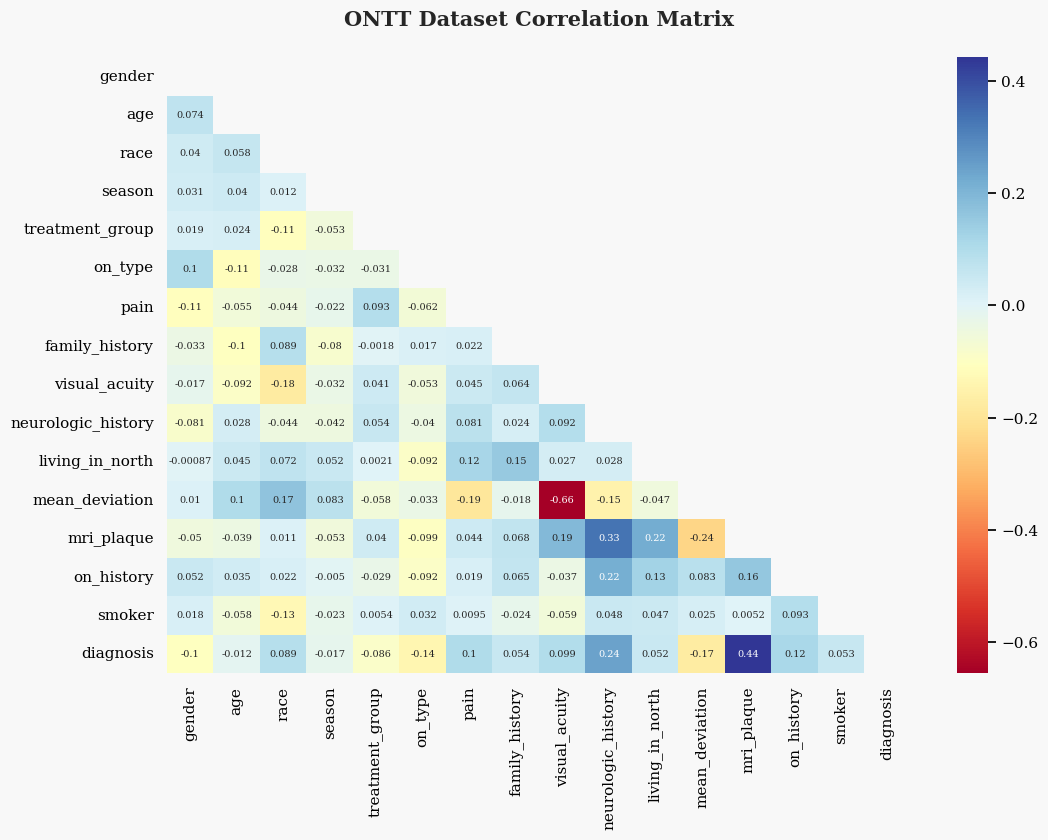

In [8]:
def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (12, 8))
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'RdYlBu', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 15, weight = 'bold')
    plt.show()
    
heatmap(data.drop(columns=['id']), "ONTT")

### EDA

#### Plaque on Brain MRI

In [9]:
l_ct = pd.crosstab(primary_df.dropna()['diagnosis'], primary_df.dropna()['mri_plaque'])
prob_ms = l_ct.iloc[1] / (l_ct.iloc[0] + l_ct.iloc[1])
print(f"Probability for MS development based on having MRI Plaques:\n{blu}With MRI Lesions:{res} {prob_ms[1]*100:.2f}% | {red}Without MRI Lesions:{res} {prob_ms[0]*100:.2f}%")

prob_l = l_ct[1]/(l_ct[1] + l_ct[0])
print(f'\n{mgt}MS Positive:{res}')
print(f"Percantage of {red}Positive MRI Plaque:{res} {prob_l[1]*100:.2f}%")
print(f"Percentage of {blu}Negative MRI Plaque:{res} {(1 - prob_l[1])*100:.2f}%")

print(f'\n{mgt}MS Negative:{res}')
print(f"Percantage of {red}Positive MRI Plaque:{res} {prob_l[0]*100:.2f}%")
print(f"Percentage of {blu}Negative MRI Plaque:{res} {(1 - prob_l[0])*100:.2f}%")

Probability for MS development based on having MRI Plaques:
With MRI Lesions: 60.62% | Without MRI Lesions: 20.42%

MS Positive:
Percantage of Positive MRI Plaque: 71.32%
Percentage of Negative MRI Plaque: 28.68%

MS Negative:
Percantage of Positive MRI Plaque: 29.30%
Percentage of Negative MRI Plaque: 70.70%


In [10]:
l_ct

mri_plaque,0.0,1.0
diagnosis,,
0,152,63
1,39,97


#### Neurologic History

In [11]:
n_ct = pd.crosstab(data['diagnosis'], data['neurologic_history'])
prob_ms = n_ct.iloc[1] / (n_ct.iloc[0] + n_ct.iloc[1])
print(f"Ratio for MS development based on prior Neurologic history:\n{blu}With Neurologic Hx:{res} {prob_ms[1]*100:.2f}% | {red}Without Neurologic Hx:{res} {prob_ms[0]*100:.2f}%")

prob_n = n_ct[1]/(n_ct[1] + n_ct[0])
print(f'\n{mgt}MS Positive:{res}')
print(f"Percantage of {red}Positive Neurologic Hx:{res} {prob_n[1]*100:.2f}%")
print(f"Percentage of {blu}Negative Neurologic Hx:{res} {(1 - prob_n[1])*100:.2f}%")

print(f'\n{mgt}MS Negative:{res}')
print(f"Percantage of {red}Positive Neurologic Hx:{res} {prob_n[0]*100:.2f}%")
print(f"Percentage of {blu}Negative Neurologic Hx:{res} {(1 - prob_n[0])*100:.2f}%")

Ratio for MS development based on prior Neurologic history:
With Neurologic Hx: 66.15% | Without Neurologic Hx: 34.37%

MS Positive:
Percantage of Positive Neurologic Hx: 27.92%
Percentage of Negative Neurologic Hx: 72.08%

MS Negative:
Percantage of Positive Neurologic Hx: 9.40%
Percentage of Negative Neurologic Hx: 90.60%


In [12]:
n_ct

neurologic_history,0.0,1.0
diagnosis,,
0.0,212,22
1.0,111,43


#### Optic Disc Swelling

In [13]:
optic_ct = pd.crosstab(data['diagnosis'], data['on_type'])
prob_ms = optic_ct.iloc[1] / (optic_ct.iloc[0] + optic_ct.iloc[1])
print(f"Ratio for MS development based on Optic Neuritis type:\n{blu}Papilitis:{res} {prob_ms[1]*100:.2f}% | {red}Retrobulbar:{res} {prob_ms[0]*100:.2f}%")

prob_optic = optic_ct[1]/(optic_ct[1] + optic_ct[0])
print(f'\n{mgt}MS Positive:{res}')
print(f"Percantage of {red}Papilitis ON:{res} {prob_optic[1]*100:.2f}%")
print(f"Percentage of {blu}Retrobulbar ON:{res} {(1 - prob_optic[1])*100:.2f}%")

print(f'\n{mgt}MS Negative:{res}')
print(f"Percantage of {red}Papilitis ON:{res} {prob_optic[0]*100:.2f}%")
print(f"Percentage of {blu}Retrobulbar ON:{res} {(1 - prob_optic[0])*100:.2f}%")

Ratio for MS development based on Optic Neuritis type:
Papilitis: 31.08% | Retrobulbar: 45.00%

MS Positive:
Percantage of Papilitis ON: 29.87%
Percentage of Retrobulbar ON: 70.13%

MS Negative:
Percantage of Papilitis ON: 43.59%
Percentage of Retrobulbar ON: 56.41%


In [14]:
optic_ct

on_type,0.0,1.0
diagnosis,,
0.0,132,102
1.0,108,46


#### Gender

In [15]:
g_ct = pd.crosstab(data['diagnosis'], data['gender'])
prob_ms = g_ct.iloc[1] / (g_ct.iloc[0] + g_ct.iloc[1])
print(f"Ratio for MS development based on Gender:\n{blu}Male:{res} {prob_ms[1] * 100: 0.2f}% | {red}Female:{res} {prob_ms[0] * 100: 0.2f}%")

prob_g = g_ct[1]/(g_ct[1] + g_ct[0])
print(f'\n{mgt}MS Positive:{res}')
print(f"Percantage of {red}Male:{res} {prob_g[1]*100:.2f}%")
print(f"Percentage of {blu}Female:{res} {(1 - prob_g[1])*100:.2f}%")

print(f'\n{mgt}MS Negative:{res}')
print(f"Percantage of {red}Male:{res} {prob_g[0]*100:.2f}%")
print(f"Percentage of {blu}Female:{res} {(1 - prob_g[0])*100:.2f}%")

Ratio for MS development based on Gender:
Male:  30.34% | Female:  42.47%

MS Positive:
Percantage of Male: 17.53%
Percentage of Female: 82.47%

MS Negative:
Percantage of Male: 26.50%
Percentage of Female: 73.50%


In [16]:
g_ct

gender,0.0,1.0
diagnosis,,
0.0,172,62
1.0,127,27


|        Variable         | Probability for MS Development |
|-------------------------|--------------------------------|
| MRI Plaque           | At least 1 lesion: 60.62%      |
|                         | No Lesions: 20.42%  
|
| Prior Neurologic Hx     | With Neurologic Hx: 66.15%     |
|                         | Without Neurologic Hx: 34.37%
|
| Optic Neuritis Type     | Papilitis: 31.08%              |
|                         | Retrobulbar: 45.00%  
|
| Gender                  | Male: 30.34%                   |
|                         | Female: 42.47% 

# 4. Feature Engineering <a name="feature-engineering"></a>

#### Ishights:
1. The final dataset has 16 variables which all are categorical except 1 variable:
* Mean Deviation - Will be categorized into 2 groups : (greater than -6db) and (lesser than -6db)

Keltner JL, Johnson CA, Spurr JO, Beck RW; Optic Neuritis Study Group. Baseline visual field profile of optic neuritis. The experience of the optic neuritis treatment trial. Arch Ophthalmol. 1993 Mar;111(3):231-4. doi: 10.1001/archopht.1993.01090020085029. PMID: 8447551.


In [17]:
# As "ON Hx" tell us the frequency of ON episodes, we simply convert it to having Hx of ON or not
data['on_history'] = (data['on_history'] > 0).astype(np.int64)

In [18]:
# Convert to 3 categories
def dev_groups(dev):
    if dev > -6:
        return 0.0
    elif dev <= -6:
        return 1.0
        
data['mean_deviation'] = data['mean_deviation'].apply(dev_groups)

#### Mean Deviation

In [19]:
d_ct = pd.crosstab(data['diagnosis'], data['mean_deviation'])
prob_ms = d_ct.iloc[1] / (d_ct.iloc[0] + d_ct.iloc[1])
print(f"Ratio for MS development base on Mean Deviation Group:\n{blu}MD > -6dB:{res} {prob_ms[0] * 100: 0.2f}% | {red}MD ≤ -6dB:{res} {prob_ms[1] * 100: 0.2f}%")

prob_d = d_ct[1]/(d_ct[1] + d_ct[0])
print(f'\n{mgt}MS Positive:{res}')
print(f"Percantage of {red}MD ≤ -6dB:{res} {prob_d[1]*100:.2f}%")
print(f"Percentage of {blu}MD > -6dB:{res} {(1 - prob_d[1])*100:.2f}%")

print(f'\n{mgt}MS Negative:{res}')
print(f"Percantage of {red}MD ≤ -6dB:{res} {prob_d[0]*100:.2f}%")
print(f"Percentage of {blu}MD > -6dB:{res} {(1 - prob_d[0])*100:.2f}%")

Ratio for MS development base on Mean Deviation Group:
MD > -6dB:  12.90% | MD ≤ -6dB:  42.02%

MS Positive:
Percantage of MD ≤ -6dB: 97.40%
Percentage of MD > -6dB: 2.60%

MS Negative:
Percantage of MD ≤ -6dB: 88.46%
Percentage of MD > -6dB: 11.54%


In [20]:
d_ct

mean_deviation,0.0,1.0
diagnosis,,
0.0,27,207
1.0,4,150


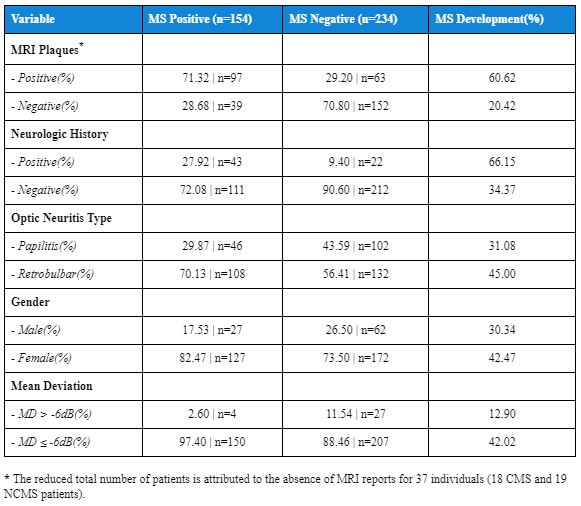

# 5. Feature Selection <a name="feature-selection"></a>

### t-test

In [21]:
from scipy.stats import ttest_ind

# Split the data into two groups based on MS Dx values
ms_patients = data[data['diagnosis'] == 1]
non_ms_patients = data[data['diagnosis'] == 0]

results = {}
# Perform t-test for each variable
for column in data.drop(columns=['id', 'diagnosis']).columns:
    if column != 'mri_plaque':
        t_statistic, p_value = ttest_ind(ms_patients[column], non_ms_patients[column], equal_var=False) 
        results[column] = [t_statistic, p_value]
    else:
        t_statistic, p_value = ttest_ind(primary_df.dropna().loc[primary_df['diagnosis'] == 1, column], primary_df.dropna().loc[primary_df['diagnosis'] == 0, column], equal_var=False)  
        results[column] = [t_statistic, p_value]

results = dict(sorted(results.items(), key= lambda item: item[1][1]))

df = pd.DataFrame(results).T.rename(columns={0: 'P-Statistics', 1: 'P-Value'}).round(5)
df

,P-Statistics,P-Value
mri_plaque,8.43282,0.00000
neurologic_history,4.51720,0.00001
mean_deviation,3.63979,0.00031
on_type,-2.78634,0.00563
pain,2.19227,0.02896
gender,-2.12398,0.03436
on_history,1.96905,0.05015
visual_acuity,1.93216,0.05424
race,1.82470,0.06886
treatment_group,-1.72667,0.08513


### Chi-Square

In [22]:
from scipy.stats import chi2_contingency

# Split the data into two groups based on MS Dx values
ms_patients = data[data['diagnosis'] == 1]
non_ms_patients = data[data['diagnosis'] == 0]

results = {}

# Perform chi-square test for each variable
for column in data.drop(columns=['id', 'diagnosis']).columns:
    if column != 'mri_plaque':
        contingency_table = pd.crosstab(data[column], data['diagnosis'])
        chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table) 
        results[column] = [chi2_statistic, p_value]
    else:
        contingency_table = pd.crosstab(primary_df['mri_plaque'], primary_df['diagnosis'])
        chi2_statistic, p_value, dof, expected = chi2_contingency(contingency_table) 
        results[column] = [chi2_statistic, p_value]

results = dict(sorted(results.items(), key= lambda item: item[1][1]))

df = pd.DataFrame(results).T.rename(columns={0: 'Chi-Square Statistic', 1: 'P-Value'}).round(7)
df.loc['gender']['P-Value'] = 0.048513
df

,Chi-Square Statistic,P-Value
mri_plaque,57.619869,0.000000
neurologic_history,21.534227,0.000003
mean_deviation,8.920249,0.002820
on_type,6.839265,0.008918
gender,3.729387,0.048513
on_history,3.619054,0.057121
visual_acuity,3.391249,0.065543
pain,3.380314,0.065979
race,2.581025,0.108152
treatment_group,2.538997,0.111065


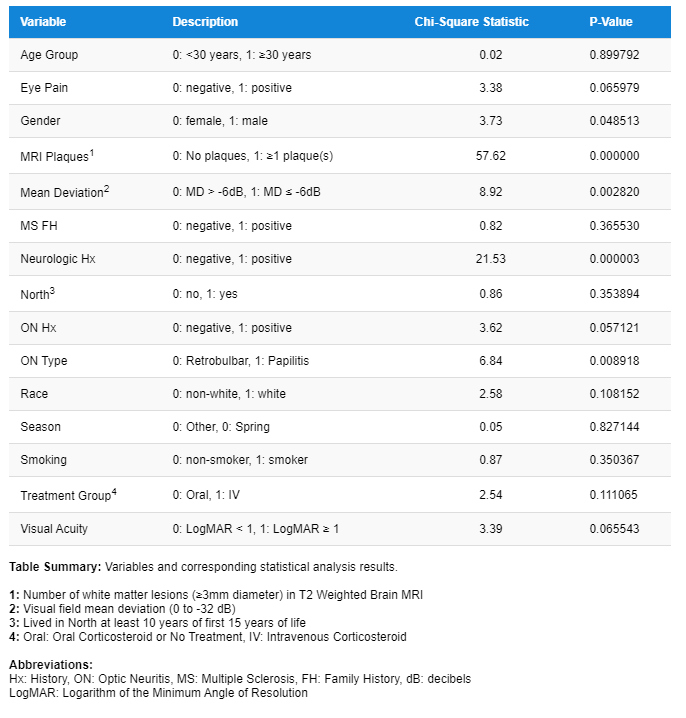

### Insights:
In this study, we employed the **chi-squared test** to evaluate the association between the categorical variables under investigation. A p-value **threshold of 0.05** was set as the criterion for statistical significance. Specifically, variables with p-values less than 0.05 were considered significant and were further analyzed in subsequent statistical tests.

In [23]:
df = df[df['P-Value'] < 0.05]
df

,Chi-Square Statistic,P-Value
mri_plaque,57.619869,0.000000
neurologic_history,21.534227,0.000003
mean_deviation,8.920249,0.002820
on_type,6.839265,0.008918
gender,3.729387,0.048513


In [24]:
final_data = data[list(df.index) + ['diagnosis']]
final_data.head()

,mri_plaque,neurologic_history,mean_deviation,on_type,gender,diagnosis
0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0


### Correlation Matrix

In [25]:
corr_matrix = final_data.corr()
corr_matrix

,mri_plaque,neurologic_history,mean_deviation,on_type,gender,diagnosis
mri_plaque,1.000000,0.332444,0.215504,-0.098757,-0.049917,0.443336
neurologic_history,0.332444,1.000000,0.106737,-0.039695,-0.080595,0.242639
mean_deviation,0.215504,0.106737,1.000000,0.055279,0.002506,0.161340
on_type,-0.098757,-0.039695,0.055279,1.000000,0.101612,-0.138189
gender,-0.049917,-0.080595,0.002506,0.101612,1.000000,-0.104305
diagnosis,0.443336,0.242639,0.161340,-0.138189,-0.104305,1.000000


### Final Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

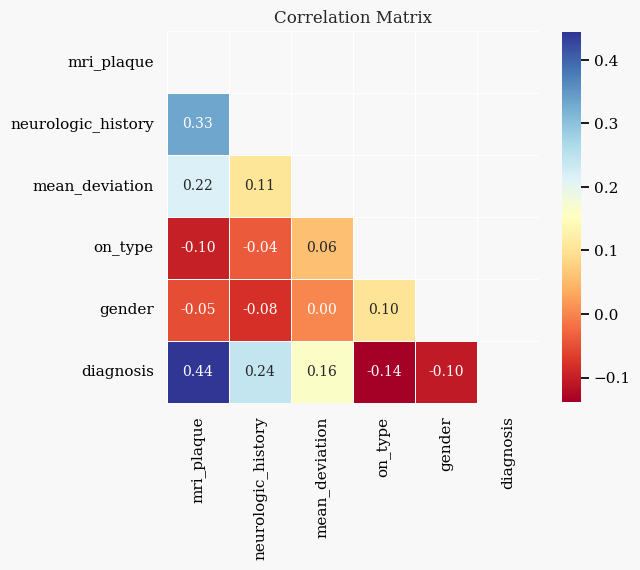

In [26]:
import seaborn as sns
fig = plt.figure(figsize=(6, 6))
# Calculate the correlation coefficients
# final_data = final_data.drop(columns=[])
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Create a heatmap visualization of the correlation matrix
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdYlBu', fmt='.2f', annot_kws={"size": 10}, linewidths=0.5, square=True, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')

### Final Count Bar

In [27]:
bar_data = data.copy()
bar_data['diagnosis'] = bar_data['diagnosis'].map({0: 'NCMS', 1: 'CMS'})
bar_data['neurologic_history'] = bar_data['neurologic_history'].map({0: 'Negative', 1: 'Positive'})
bar_data['mean_deviation'] = bar_data['mean_deviation'].map({0: '> -6dB', 1: '≤ -6dB'})
bar_data['on_type'] = bar_data['on_type'].map({0: 'Retrobulbar', 1: 'Papilitis'})
bar_data['gender'] = bar_data['gender'].map({0: 'Female', 1: 'Male'})

primary_df['diagnosis'] = primary_df['diagnosis'].map({0: 'NCMS', 1: 'CMS'})
primary_df['mri_plaque'] = primary_df['mri_plaque'].map({0: 'Negative', 1: 'Positive'})

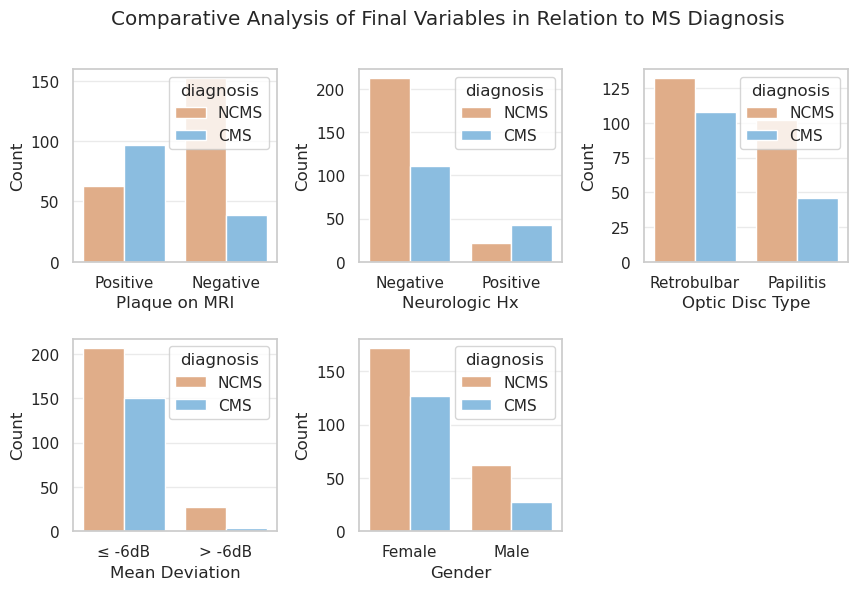

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
cm = sns.color_palette(["#EEAB7B", "#7DBFEE"])
# Create a bar chart with hue
sns.countplot(x='mri_plaque', hue='diagnosis', data=primary_df.dropna(), palette=cm, ax=axes[0, 0])
axes[0, 0].set_xlabel('Plaque on MRI')
axes[0, 0].set_ylabel('Count')

# Create a bar chart with hue
sns.countplot(x='neurologic_history', hue='diagnosis', data=bar_data, palette=cm, ax=axes[0, 1])
axes[0, 1].set_xlabel('Neurologic Hx')
axes[0, 1].set_ylabel('Count')

# Create a bar chart with hue
sns.countplot(x='on_type', hue='diagnosis', data=bar_data, palette=cm, ax=axes[0, 2])
axes[0, 2].set_xlabel('Optic Disc Type')
axes[0, 2].set_ylabel('Count')

# Create a bar chart with hue
sns.countplot(x='mean_deviation', hue='diagnosis', data=bar_data, palette=cm, ax=axes[1, 0])
axes[1, 0].set_xlabel('Mean Deviation')
axes[1, 0].set_ylabel('Count')

# Create a bar chart with hue
sns.countplot(x='gender', hue='diagnosis', data=bar_data, palette=cm, ax=axes[1, 1])
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

fig.suptitle("Comparative Analysis of Final Variables in Relation to MS Diagnosis")
# Remove the extra subplot
fig.delaxes(axes[1, 2])

# 6. Model Creation <a name="model-creation"></a>

### Step 1 -> Split target and features

In [29]:
columns = ['mri_plaque', 'mean_deviation', 'neurologic_history', 'gender', 'on_type']

In [30]:
X = data[columns]
X = pd.get_dummies(X, columns=X.columns)
y = data['diagnosis']

### Step 2 -> Split data into train and test 
1. Train set: Will be used for training and cross-validation
2. Test set(Hold-Out): Will be used for final evaluation after model was trainde and cross-validated

In [31]:
from sklearn.model_selection import train_test_split
rs = 41
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=rs)

### Step 3 -> Decision Tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score

# Define number of folds for cross-validation
splits = 10
repeats = 10

# Initialize cross-validation object
rs_kf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=repeats, random_state=rs)

hist = {'acc': [], 'ruc':[], 'pre': [], 'rec': [], 'f1': [], 'y_probas': [], 'total_y': []}

fprs, tprs = [], []

# Iterate over each fold
for i, (train_index, val_index) in enumerate(rs_kf.split(X_train, y_train)):
    
    # Split data into train and val sets for current fold
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train a Decision Tree model
    model = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.003)
    model.fit(X_train_fold, y_train_fold)
    
    # Predict the labels of the testing set
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_val, y_proba)
    
    fprs.append(fpr)
    tprs.append(tpr)

    # Compute and record the evaluation metrics for the current fold
    hist['acc'].append(accuracy_score(y_val, y_pred))
    hist['ruc'].append(roc_auc_score(y_val, y_proba))
    hist['pre'].append(precision_score(y_val, y_pred))
    hist['rec'].append(recall_score(y_val, y_pred))
    hist['f1'].append(f1_score(y_val, y_pred))
    hist['y_probas'].extend(y_proba)
    hist['total_y'].extend(y_val)
    
    if (i+1) % 20 == 0:
        print(f"Fold: {red}{i+1:>3}{res} | Mean RUC: {blu}{np.mean(hist['ruc']):0.2f}{res} | Mean ACC: {mgt}{np.mean(hist['acc']):0.2f}{res}")
    

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
    
# Compute evaluation metrics for CV set
cv_metrics = {
    'Accuracy': f"{np.mean(hist['acc']):.2f}",
    'RUC': f"{roc_auc_score(hist['total_y'], hist['y_probas']):.2f}",
    'Precision': f"{np.mean(hist['pre']):.2f}",
    'Recall': f"{np.mean(hist['rec']):.2f}",
    'F1 Score': f"{np.mean(hist['f1']):.2f}"
}

# Compute evaluation metrics for test set
test_metrics = {
    'Accuracy': f"{accuracy_score(y_test, y_pred):.2f}",
    'RUC': f"{roc_auc_score(y_test, y_proba):.2f}",
    'Precision': f"{precision_score(y_test, y_pred):.2f}",
    'Recall': f"{recall_score(y_test, y_pred):.2f}",
    'F1 Score': f"{f1_score(y_test, y_pred):.2f}"
}


pd.DataFrame([cv_metrics, test_metrics], index=['Cross-Validation', 'Test']).T


Fold:  20 | Mean RUC: 0.75 | Mean ACC: 0.73
Fold:  40 | Mean RUC: 0.75 | Mean ACC: 0.72
Fold:  60 | Mean RUC: 0.76 | Mean ACC: 0.73
Fold:  80 | Mean RUC: 0.76 | Mean ACC: 0.73
Fold: 100 | Mean RUC: 0.76 | Mean ACC: 0.73


,Cross-Validation,Test
Accuracy,0.73,0.71
RUC,0.74,0.73
Precision,0.63,0.62
Recall,0.76,0.68
F1 Score,0.69,0.65


In [33]:
X.rename(columns={
    'mri_plaque_1.0': 'Plaque on MRI?',
    'mri_plaque_0.0': 'No Plaque on MRI?',
    'on_type_0.0': 'Optic Neuritis Type?',
    'on_type_1.0': 'Papilitis?',
    'gender_0.0': 'Gender?',
    'gender_1.0': 'Male?',
    'mean_deviation_0.0': 'Mean Deviation? 0',
    'mean_deviation_1.0': 'Mean Deviation?',
    'neurologic_history_0.0': 'Neurologic History?0',
    'neurologic_history_1.0': 'Neurologic History?'
}, inplace=True)

for i in range(1000):
    model.fit(X_train, y_train)
    # export the decision tree to a DOT file
    dot_data = export_graphviz(model, out_file=None, 
                             feature_names=X.columns,  
                             class_names=['NCMS', 'CMS'],  label='all', impurity=False,
                             filled=True, rounded=True, proportion=True,
                             special_characters=False)

    # create a graph from the DOT data
    graph = graphviz.Source(dot_data)

    # save the graph to a file
    graph.render(f'all_trees/decision_tree{i}', format='png')

In [34]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.003)

In [35]:
from my_graph import export_graphviz

In [36]:
# from sklearn.tree import export_graphviz
import graphviz

# export the decision tree to a DOT file
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['NCMS', 'CMS'],  label='all', impurity=False,
                         filled=True, rounded=True, proportion=True, node_ids=True,
                         special_characters=False)

# create a graph from the DOT data
graph = graphviz.Source(dot_data)

# save the graph to a file
# graph.render('decision_tree', format='png')
# graph

### Short Tree

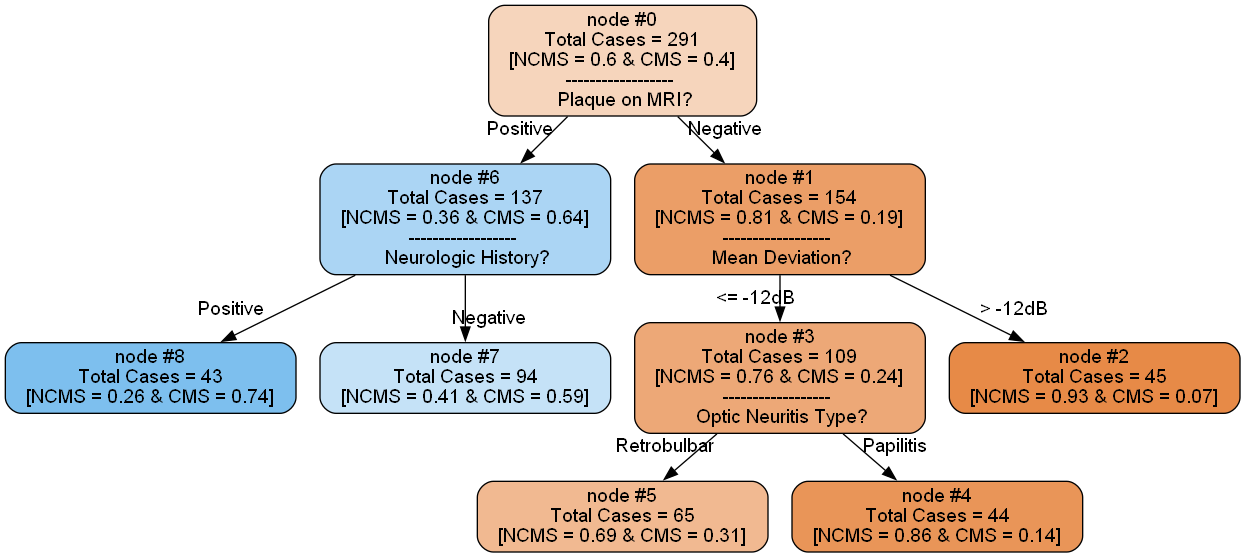

---------------------------------------------------------------------------------

### Full Tree

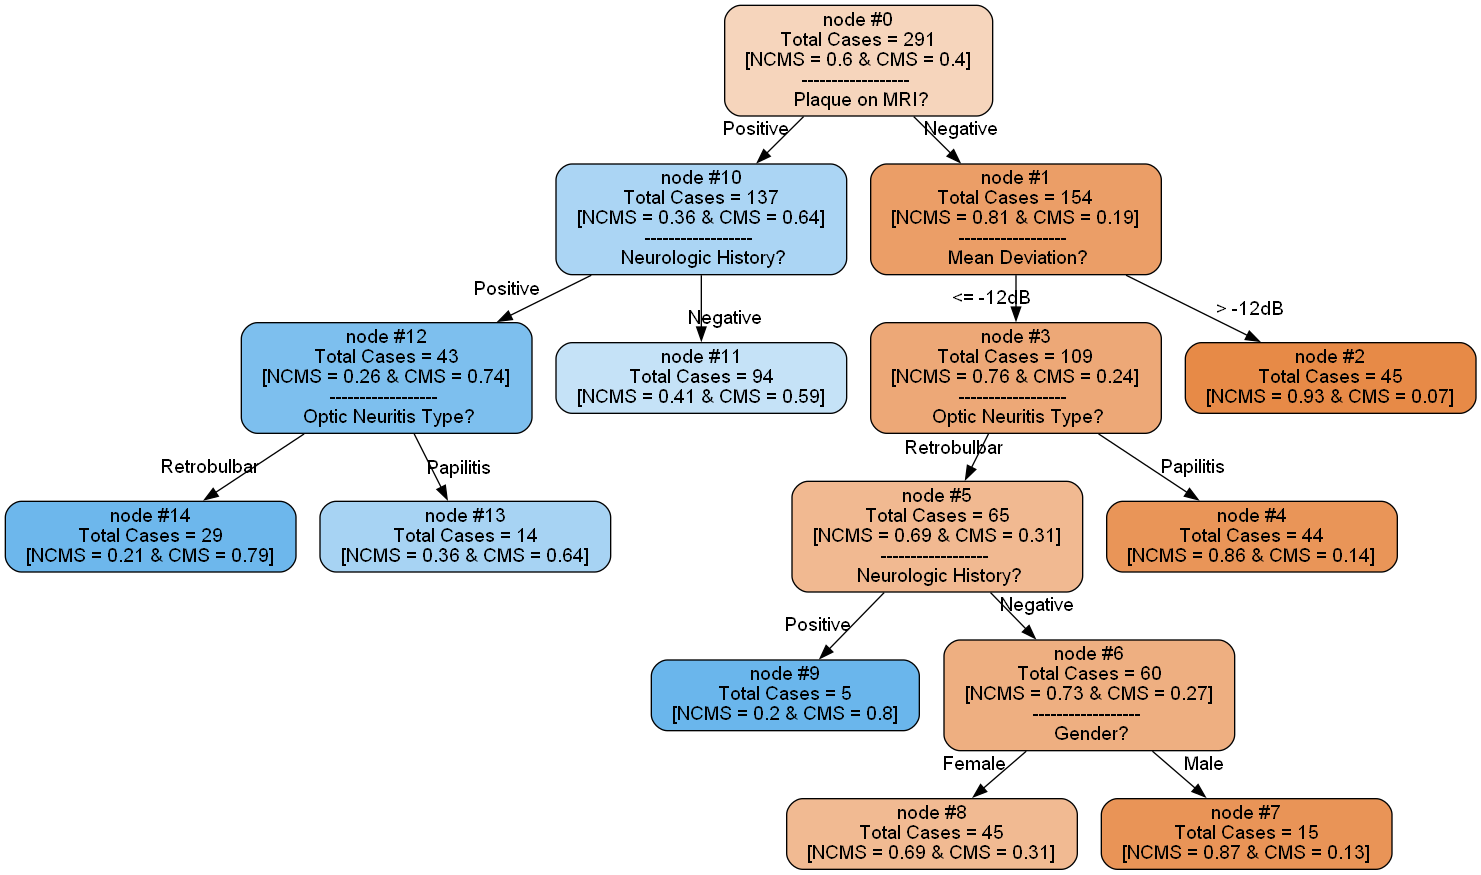


# 7. Model Evaluation <a name="model-evaluation"></a>

### Metrics

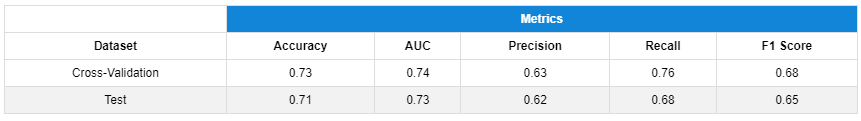

### ROC Curve

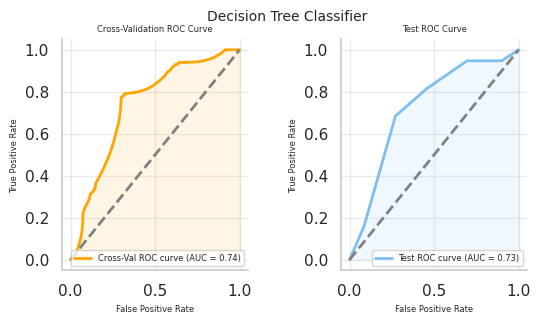

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# compute ROC curve and AUC for Cross-Validation
fpr_cv, tpr_cv, thresholds_cv = roc_curve(hist['total_y'], hist['y_probas'])
roc_auc_cv = auc(fpr_cv, tpr_cv)

# compute ROC curve and AUC for Test
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba)
roc_auc_test = auc(fpr_test, tpr_test)

font_size = 6
# Plot the ROC curve for cross-validation
ax[0].plot(fpr_cv, tpr_cv, color='orange', lw=2, label='Cross-Val ROC curve (AUC = %0.2f)' % roc_auc_cv)
ax[0].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[0].legend(loc="lower right", fontsize=font_size)
ax[0].fill_between(fpr_cv, tpr_cv, color='orange', alpha=0.1)

# Plot the ROC curve for test
ax[1].plot(fpr_test, tpr_test, color='#7DBFEE', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
ax[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
ax[1].legend(loc="lower right", fontsize=font_size)
ax[1].fill_between(fpr_test, tpr_test, color='#7DBFEE', alpha=0.1)


# Use Seaborn to style the plots
sns.set_style("whitegrid")
sns.despine()

# Set labels for axes and title
ax[0].set_xlabel('False Positive Rate', fontsize=font_size)
ax[0].set_ylabel('True Positive Rate', fontsize=font_size)
ax[0].set_title('Cross-Validation ROC Curve', fontsize=font_size)

# Set labels for axes and title
ax[1].set_xlabel('False Positive Rate', fontsize=font_size)
ax[1].set_ylabel('True Positive Rate', fontsize=font_size)
ax[1].set_title('Test ROC Curve', fontsize=font_size)

# Add main title
fig.suptitle('Decision Tree Classifier', fontsize=10)


# Show the plots
plt.show()

### Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix (Test Set)')

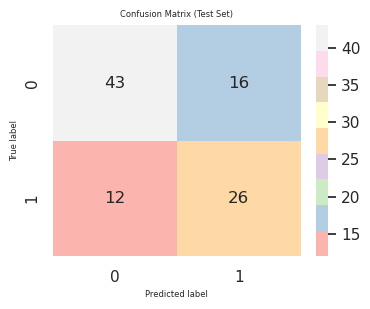

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# compute confusion matrix for test set
cm_test = confusion_matrix(y_test, y_pred)


# add a confusion matrix subplot
sns.heatmap(cm_test, annot=True, cmap="Pastel1")
ax.set_xlabel('Predicted label', fontsize=font_size)
ax.set_ylabel('True label', fontsize=font_size)
ax.set_title('Confusion Matrix (Test Set)', fontsize=font_size)